In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time

from repressilator import Repressilator

In [2]:
class EA(object):
    def __init__(self, repressilator, pop_size, std=0.1):
        self.repressilator = repressilator
        self.pop_size = pop_size
        self.std = std
        
    def selection(self, x_old, f_old, x, f):
        x_cat = np.concatenate([x, x_old], 0)
        f_cat = np.concatenate([f, f_old])
        ind = np.argsort(f_cat)
        x = x_cat[ind]
        f = f_cat[ind]
        return x[:self.pop_size], f[:self.pop_size]
    
    def fitness(self, x):
        return self.repressilator.objective(x)
    
    def mutation(self, x, std=0.1):
        ret = np.clip(x + np.random.randn(x.shape[0], x.shape[1]) * std, a_min=[-2., 0., -5., 500.], a_max=[10., 10., 20., 2500.])
        return ret
    
    
    def parent(self, x_parent): #combined parent selection and recombination into 1 step
        x_child =[]
        while len(x_child)<len(x_parent):
            ind = np.random.randint(0,pop_size)
            ind2 = np.random.randint(0,pop_size)
            child1 =(x_parent[ind]+x_parent[ind2])/2
            x_child.append(child1)
        x_child = np.array(x_child)
        return x_child
    
    def step(self, x_old, f_old, recom, mutate):
        if recom == 1:
            x_child = self.parent(x_old)
        else:
            x_child = x_old
        if mutate == 1:
            x = self.mutation(x_child, std=self.std)
        else:
            x = x_child
        f = self.fitness(x)
        x, f = self.selection(x_old, f_old, x, f)
        
        return x, f

In [3]:
#Load data and repressilator function
y_real = pickle.load(open('data.pkl', 'rb'))
params = pickle.load(open('params.pkl', 'rb'))
r = Repressilator(y_real, params)


In [87]:
#Set hyper-Parameters
pop_size = 500
generations = 10
std =0.4

In [88]:
#set up class and generate initial starting population and respective fitness score
ea = EA(r, pop_size=pop_size, std=std)
np.random.seed(1)
x = np.random.uniform(low=[-2., 0., -5., 500.], high=[10., 10., 20., 2500.], size=(pop_size,4))
f = ea.fitness(x)

In [89]:
#Initialise lists
order = [("a0","n","c"),("a0","beta","b"),("a0","alpha","g"),("n","beta","r"),("n","alpha","brown"),("beta","alpha","purple")]
#labels =["a0","N","Beta","Alpha"]
averages = []
a0 =[]
n=[]
beta =[]
alpha =[]
best_f = []

t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
Time taken =  309.9507908821106
[115.55386664788885, 112.95785728040025, 110.70656116072092, 107.64003351054743, 104.41654893038475, 101.45926887948194, 99.7954024061777, 98.84543587075163, 98.44926731512942, 98.26499865976565]


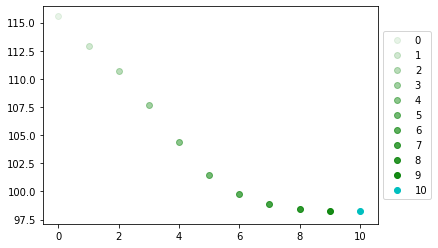

In [90]:
#create all candidate/future generations and save each into a list
time_begin = time.time()
for i in range(generations):
    x,f = ea.step(x,f,1,1)
    averages.append(np.mean(f))
    a0.append(x[:,0])
    n.append(x[:,1])
    beta.append(x[:,2])
    alpha.append(x[:,3])
    best_f.append(max(f))
    plt.scatter(i,averages[i], c='g', alpha=(i+1.)/(generations+1.), label=i)
i+=1
plt.scatter(generations,averages[i-1], c='c', alpha=(i+1.)/(generations+1.), label=i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
time_end = time.time()
print("Time taken = ", (time_end - time_begin))
print(averages)

In [91]:
#create dictionary holding list of values per variable
dict_variables = {"a0": a0,
             "n": n,
             "beta" : beta,
             "alpha" : alpha
            }

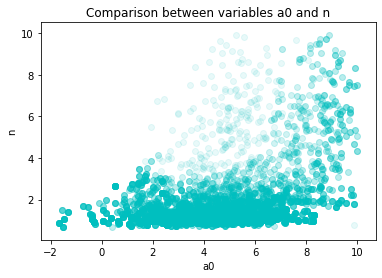

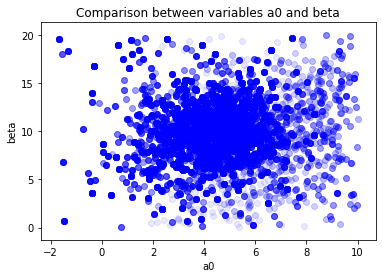

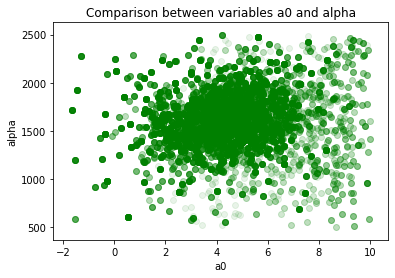

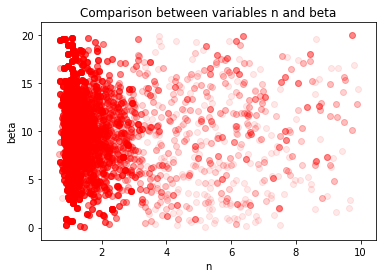

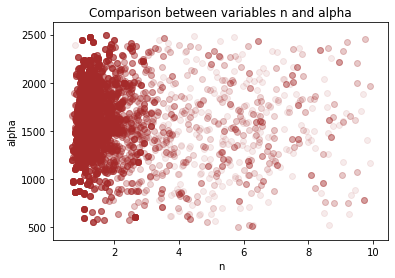

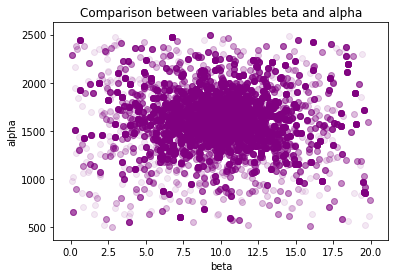

In [92]:
#print graphs comparing variables for each population
for i in order:
    for t in range(generations):
        for p in range(pop_size):
            plt.scatter(dict_variables[i[0]][t][p],dict_variables[i[1]][t][p], c=i[2], alpha=(t+1.)/(generations+1.),label =i)
    plt.xlabel(i[0])
    plt.ylabel(i[1])
    plt.title("Comparison between variables " + i[0]+" and "+ i[1] )
    plt.show()

